# Exploratory Data Analysis (EDA) Lesson

## Introduction
This notebook will guide you through the process of Exploratory Data Analysis (EDA).
EDA is an important step in understanding the underlying patterns, structures, and relationships in your dataset.
It helps in identifying trends, outliers, and potential areas for further analysis.

# Section 1: Importing Necessary Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust display settings for better readability
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

df = pd.read_csv('cost_of_living_with_missing_values.csv')

# Section 2: Exploring the data

In [6]:
# Display the first few rows of the dataset to get an initial look at the data.
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


case_id state  isMetro            areaname          county  \
0        1    AL     True  Montgomery, AL MSA  Autauga County   
1        1    AL     True  Montgomery, AL MSA  Autauga County   
2        1    AL     True  Montgomery, AL MSA  Autauga County   
3        1    AL     True  Montgomery, AL MSA  Autauga County   
4        1    AL     True  Montgomery, AL MSA  Autauga County   

  family_member_count  housing_cost    food_cost  transportation_cost  \
0                1p0c    8505.72876   3454.91712          10829.16876   
1                1p1c   12067.50240   5091.70788          11588.19288   
2                1p2c   12067.50240          NaN          12361.77720   
3                1p3c   15257.15040          NaN          13452.18600   
4                1p4c   15257.15040  12182.21400          13744.59840   

   healthcare_cost  other_necessities_cost  childcare_cost        taxes  \
0       5737.47984              4333.81344          0.0000          NaN   
1       8659.55640              6217.45896       6147.8298   7422.07836   
2      11581.63260              7075.65816      15824.6940   9769.56228   
3      14503.70760              9134.35620      18802.1892  13101.70320   
4      17425.78560              9942.36396      18802.1892          NaN   

    total_cost  median_family_income  year  
0   39254.0532          73010.414062  2021  
1   57194.3256          73010.414062  2021  
2   76141.0308          73010.414062  2021  
3   94203.5328          73010.414062  2021  
4  100823.5200          73010.414062  2021

In [8]:
print("\nBasic Information:")
df.info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31430 entries, 0 to 31429
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   case_id                 31430 non-null  int64  
 1   state                   31430 non-null  object 
 2   isMetro                 31430 non-null  bool   
 3   areaname                31430 non-null  object 
 4   county                  31430 non-null  object 
 5   family_member_count     31430 non-null  object 
 6   housing_cost            28258 non-null  float64
 7   food_cost               28298 non-null  float64
 8   transportation_cost     28294 non-null  float64
 9   healthcare_cost         28235 non-null  float64
 10  other_necessities_cost  28319 non-null  float64
 11  childcare_cost          28265 non-null  float64
 12  taxes                   28246 non-null  float64
 13  total_cost              28235 non-null  float64
 14  median_family_inco

In [10]:
# Let's look at the summary statistics for the numerical columns in the dataset.
# This provides insights into the central tendency, dispersion, and shape of the distribution of the data.

print("\nSummary Statistics:")
display(df.describe())


Summary Statistics:


case_id  housing_cost     food_cost  transportation_cost  \
count  31430.000000  28258.000000  28298.000000         28294.000000   
mean    1589.311804  11071.892619   8280.958044         13600.241626   
std      917.218414   4146.931912   3269.958944          1639.407648   
min        1.000000   4209.311280   2251.402440          2216.461440   
25%      792.000000   8580.000000   5782.403280         12545.878200   
50%     1593.000000  10428.000000   8099.270520         13701.823200   
75%     2386.000000  12444.000000  10718.885760         14766.054300   
max     3171.000000  61735.587600  31178.619600         19816.482000   

       healthcare_cost  other_necessities_cost  childcare_cost         taxes  \
count     28235.000000            28319.000000    28265.000000  28246.000000   
mean      13397.578213             7013.358206     9864.953563   7652.886732   
std        5206.329498             2396.456092     6775.965371   3331.851688   
min        3476.379960             2611.642080        0.000000   1027.800756   
25%        9671.714400             5282.929680     5334.758400   5589.072270   
50%       13083.951600             6733.056120    10154.877720   6891.359280   
75%       16637.455800             8411.552820    14265.572400   8798.509860   
max       37252.274400            28829.443200    48831.085200  47753.390400   

          total_cost  median_family_income     year  
count   28235.000000          31420.000000  31430.0  
mean    70948.125243          68315.997017   2021.0  
std     21851.068503          16886.970245      0.0  
min     30087.662400          25529.976562   2021.0  
25%     53795.991000          57223.988281   2021.0  
50%     71008.324800          65955.605469   2021.0  
75%     85433.220600          76136.070312   2021.0  
max    223717.548000         177662.468750   2021.0

# Section 5: Checking for Missing Data
Missing data can significantly affect the outcome of your analysis.
Here, we check for any missing values in the dataset and visualize them using a heatmap.

In [13]:
print("\nMissing Values:")
display(df.isnull().sum())


Missing Values:


case_id                      0
state                        0
isMetro                      0
areaname                     0
county                       0
family_member_count          0
housing_cost              3172
food_cost                 3132
transportation_cost       3136
healthcare_cost           3195
other_necessities_cost    3111
childcare_cost            3165
taxes                     3184
total_cost                3195
median_family_income        10
year                         0
dtype: int64

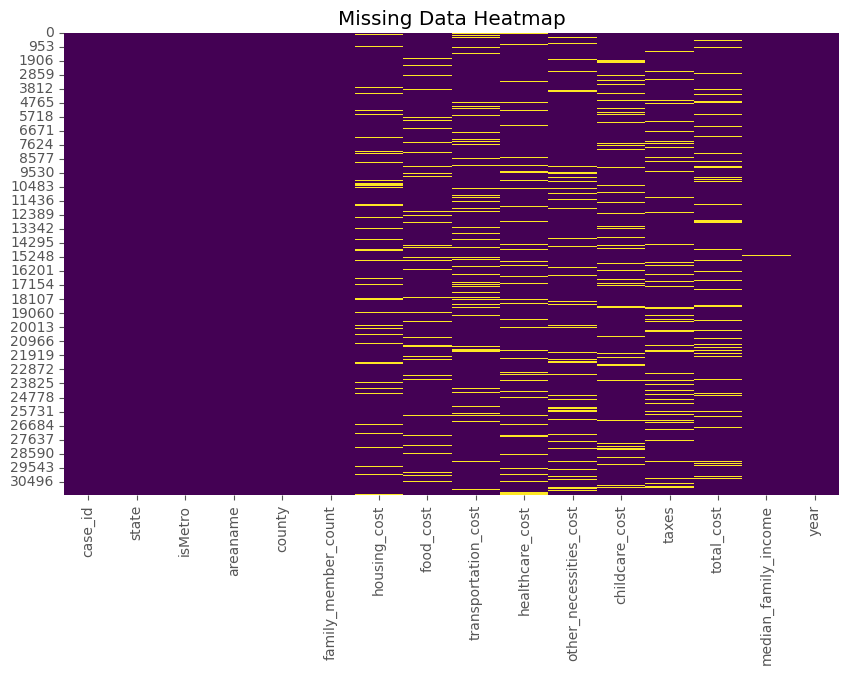

In [15]:
# Visualize the missing data with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# Section 6: Visualizing the Distribution of Numerical Variables
Histograms are a great way to understand the distribution of numerical data.
In this section, we'll plot histograms for all numerical variables to see how data is distributed.

<Figure size 1000x600 with 0 Axes>

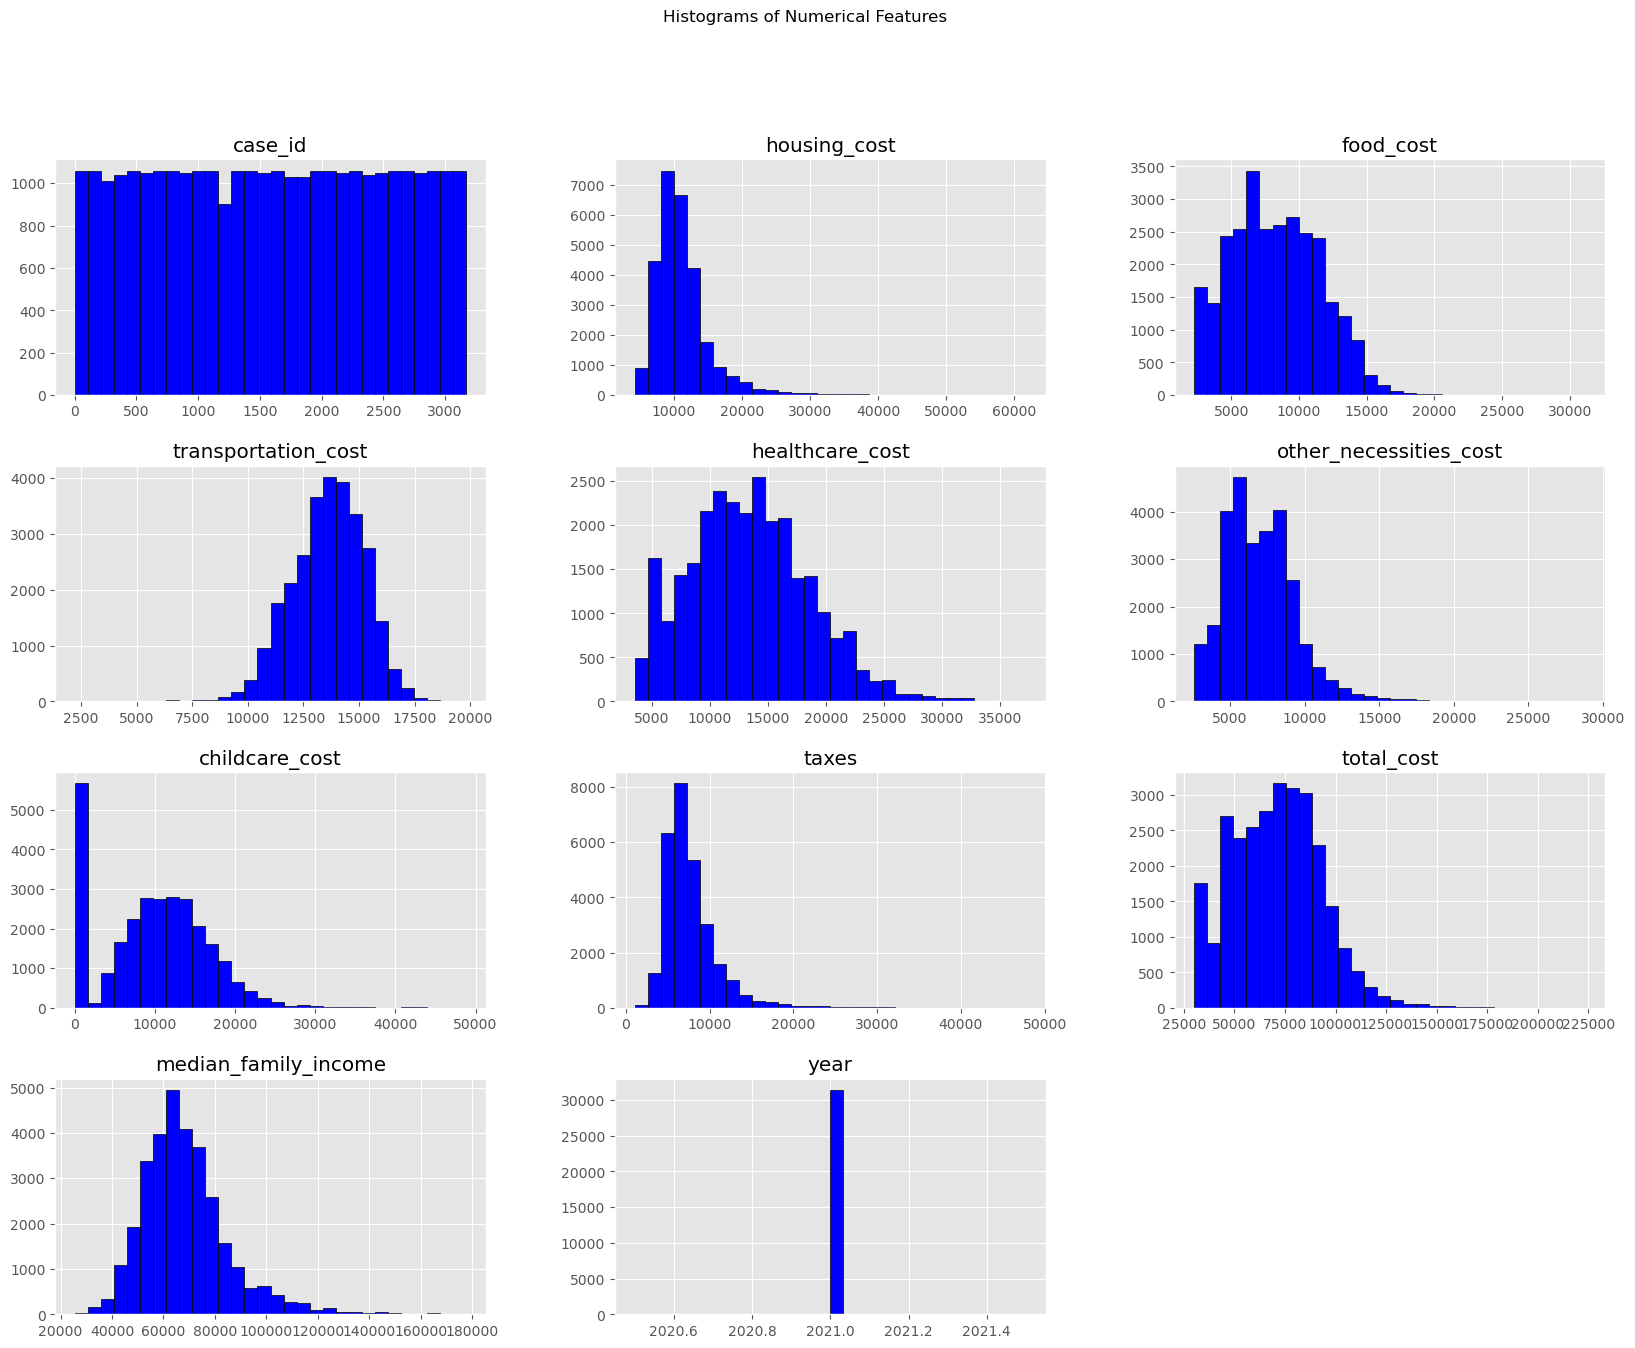

In [21]:
plt.figure(figsize=(10, 6))
df.hist(bins=30, figsize=(20, 15), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Section 8: Correlation Matrix
A correlation matrix helps in understanding the relationship between different numerical variables.
In this section, we'll generate a correlation matrix and visualize it using a heatmap.

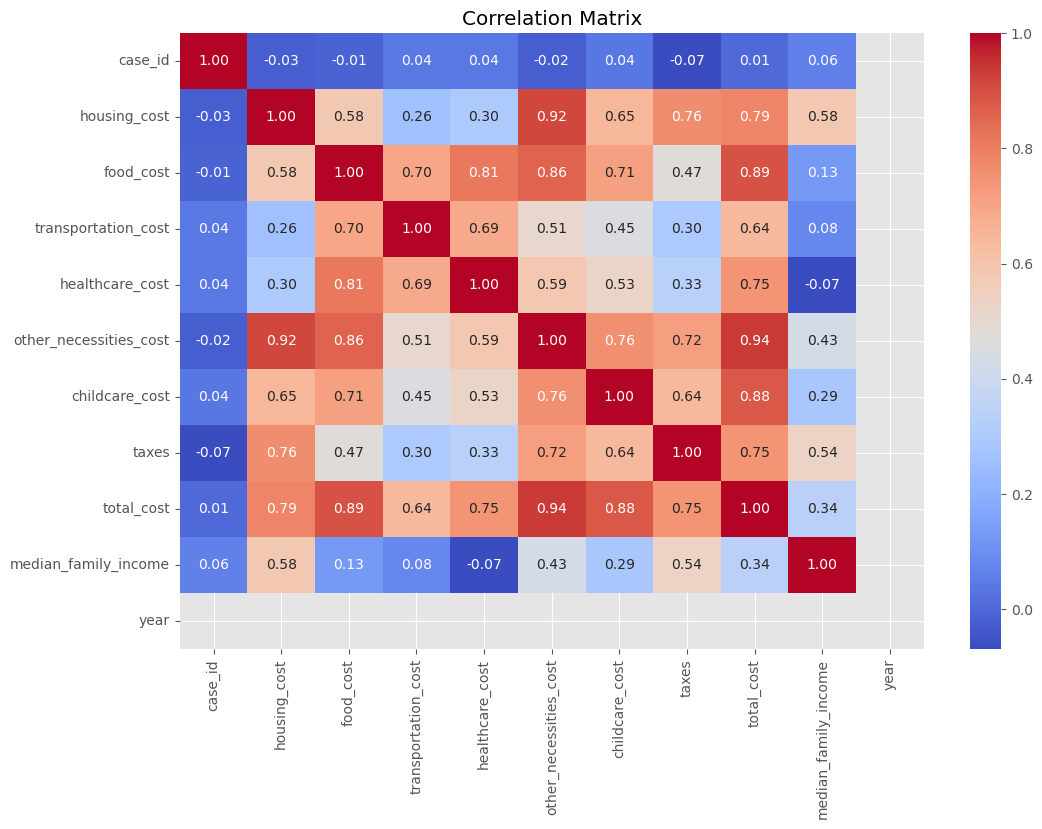

In [33]:
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
corr_matrix = numeric_df.corr()  # Now only numeric columns are used
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Section 9: Pairplot for Numerical Features
Pairplots are used to explore the relationships between pairs of variables.
This plot will help you visually inspect correlations and distributions across multiple features.

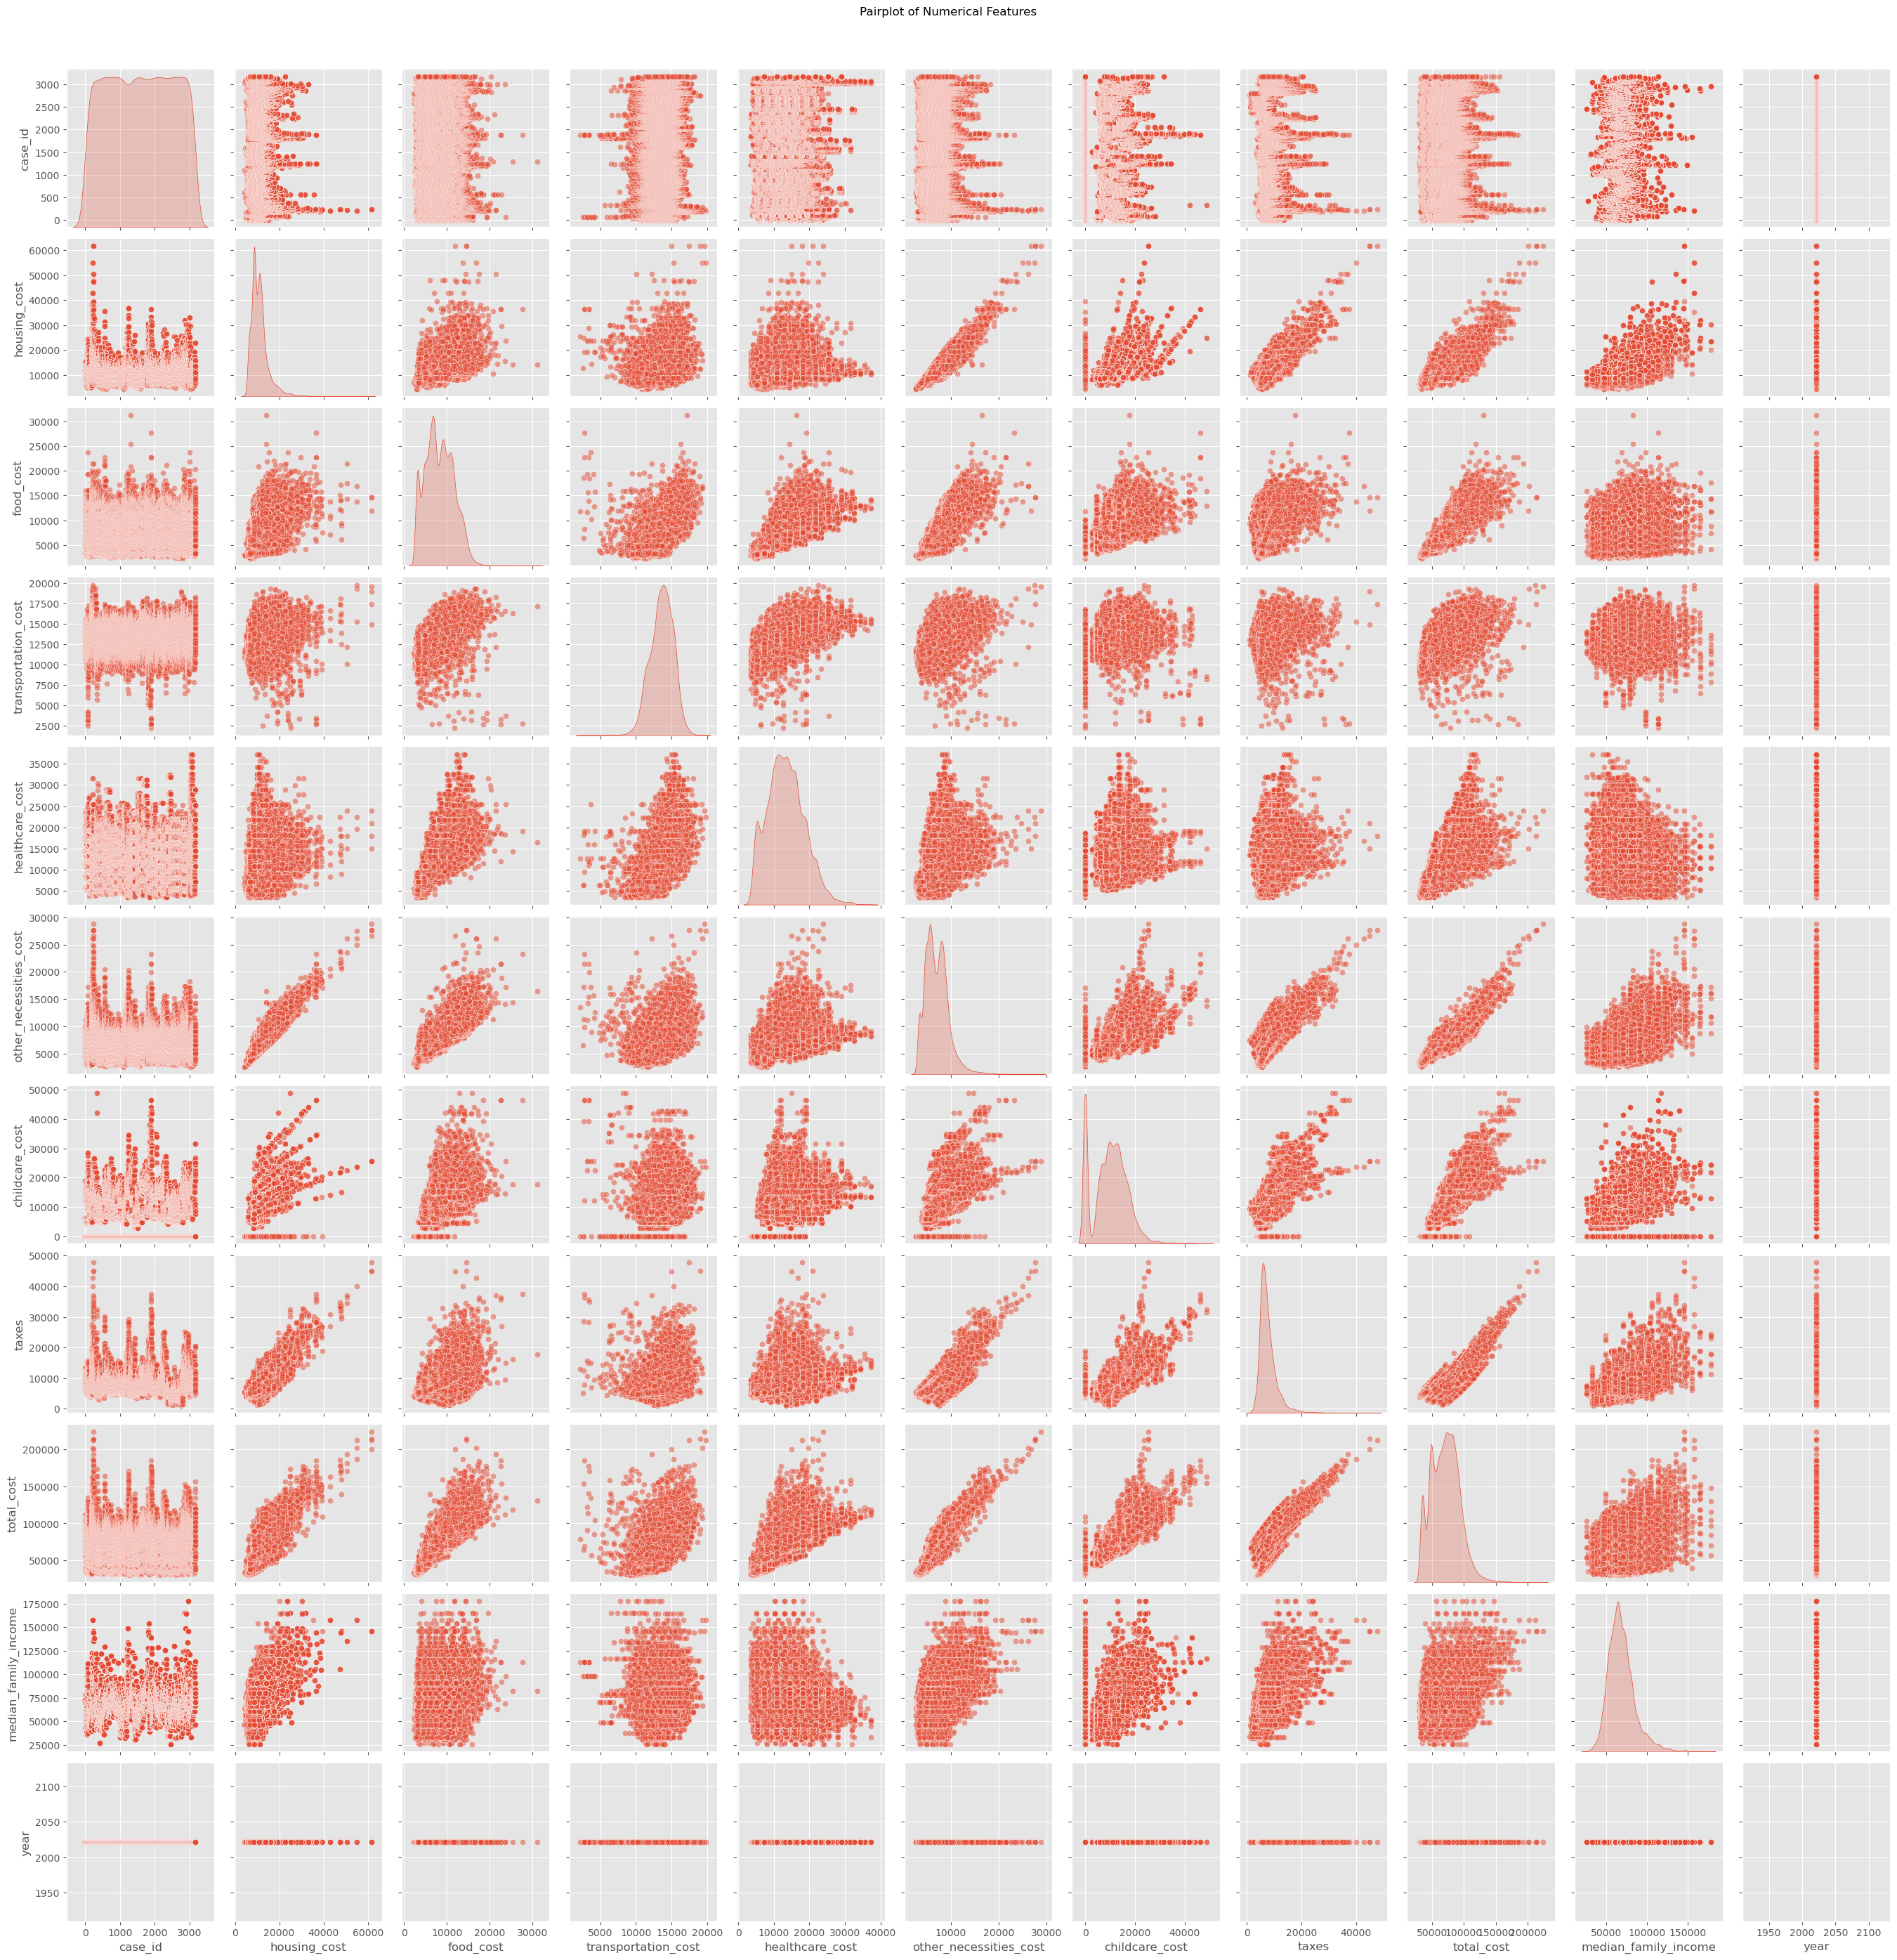

In [36]:
sns.pairplot(df.select_dtypes(include=[np.number]), diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

# Section 10: Identifying Outliers with Boxplots
Outliers are data points that differ significantly from other observations.
Boxplots are useful for detecting outliers and understanding the spread of the data.

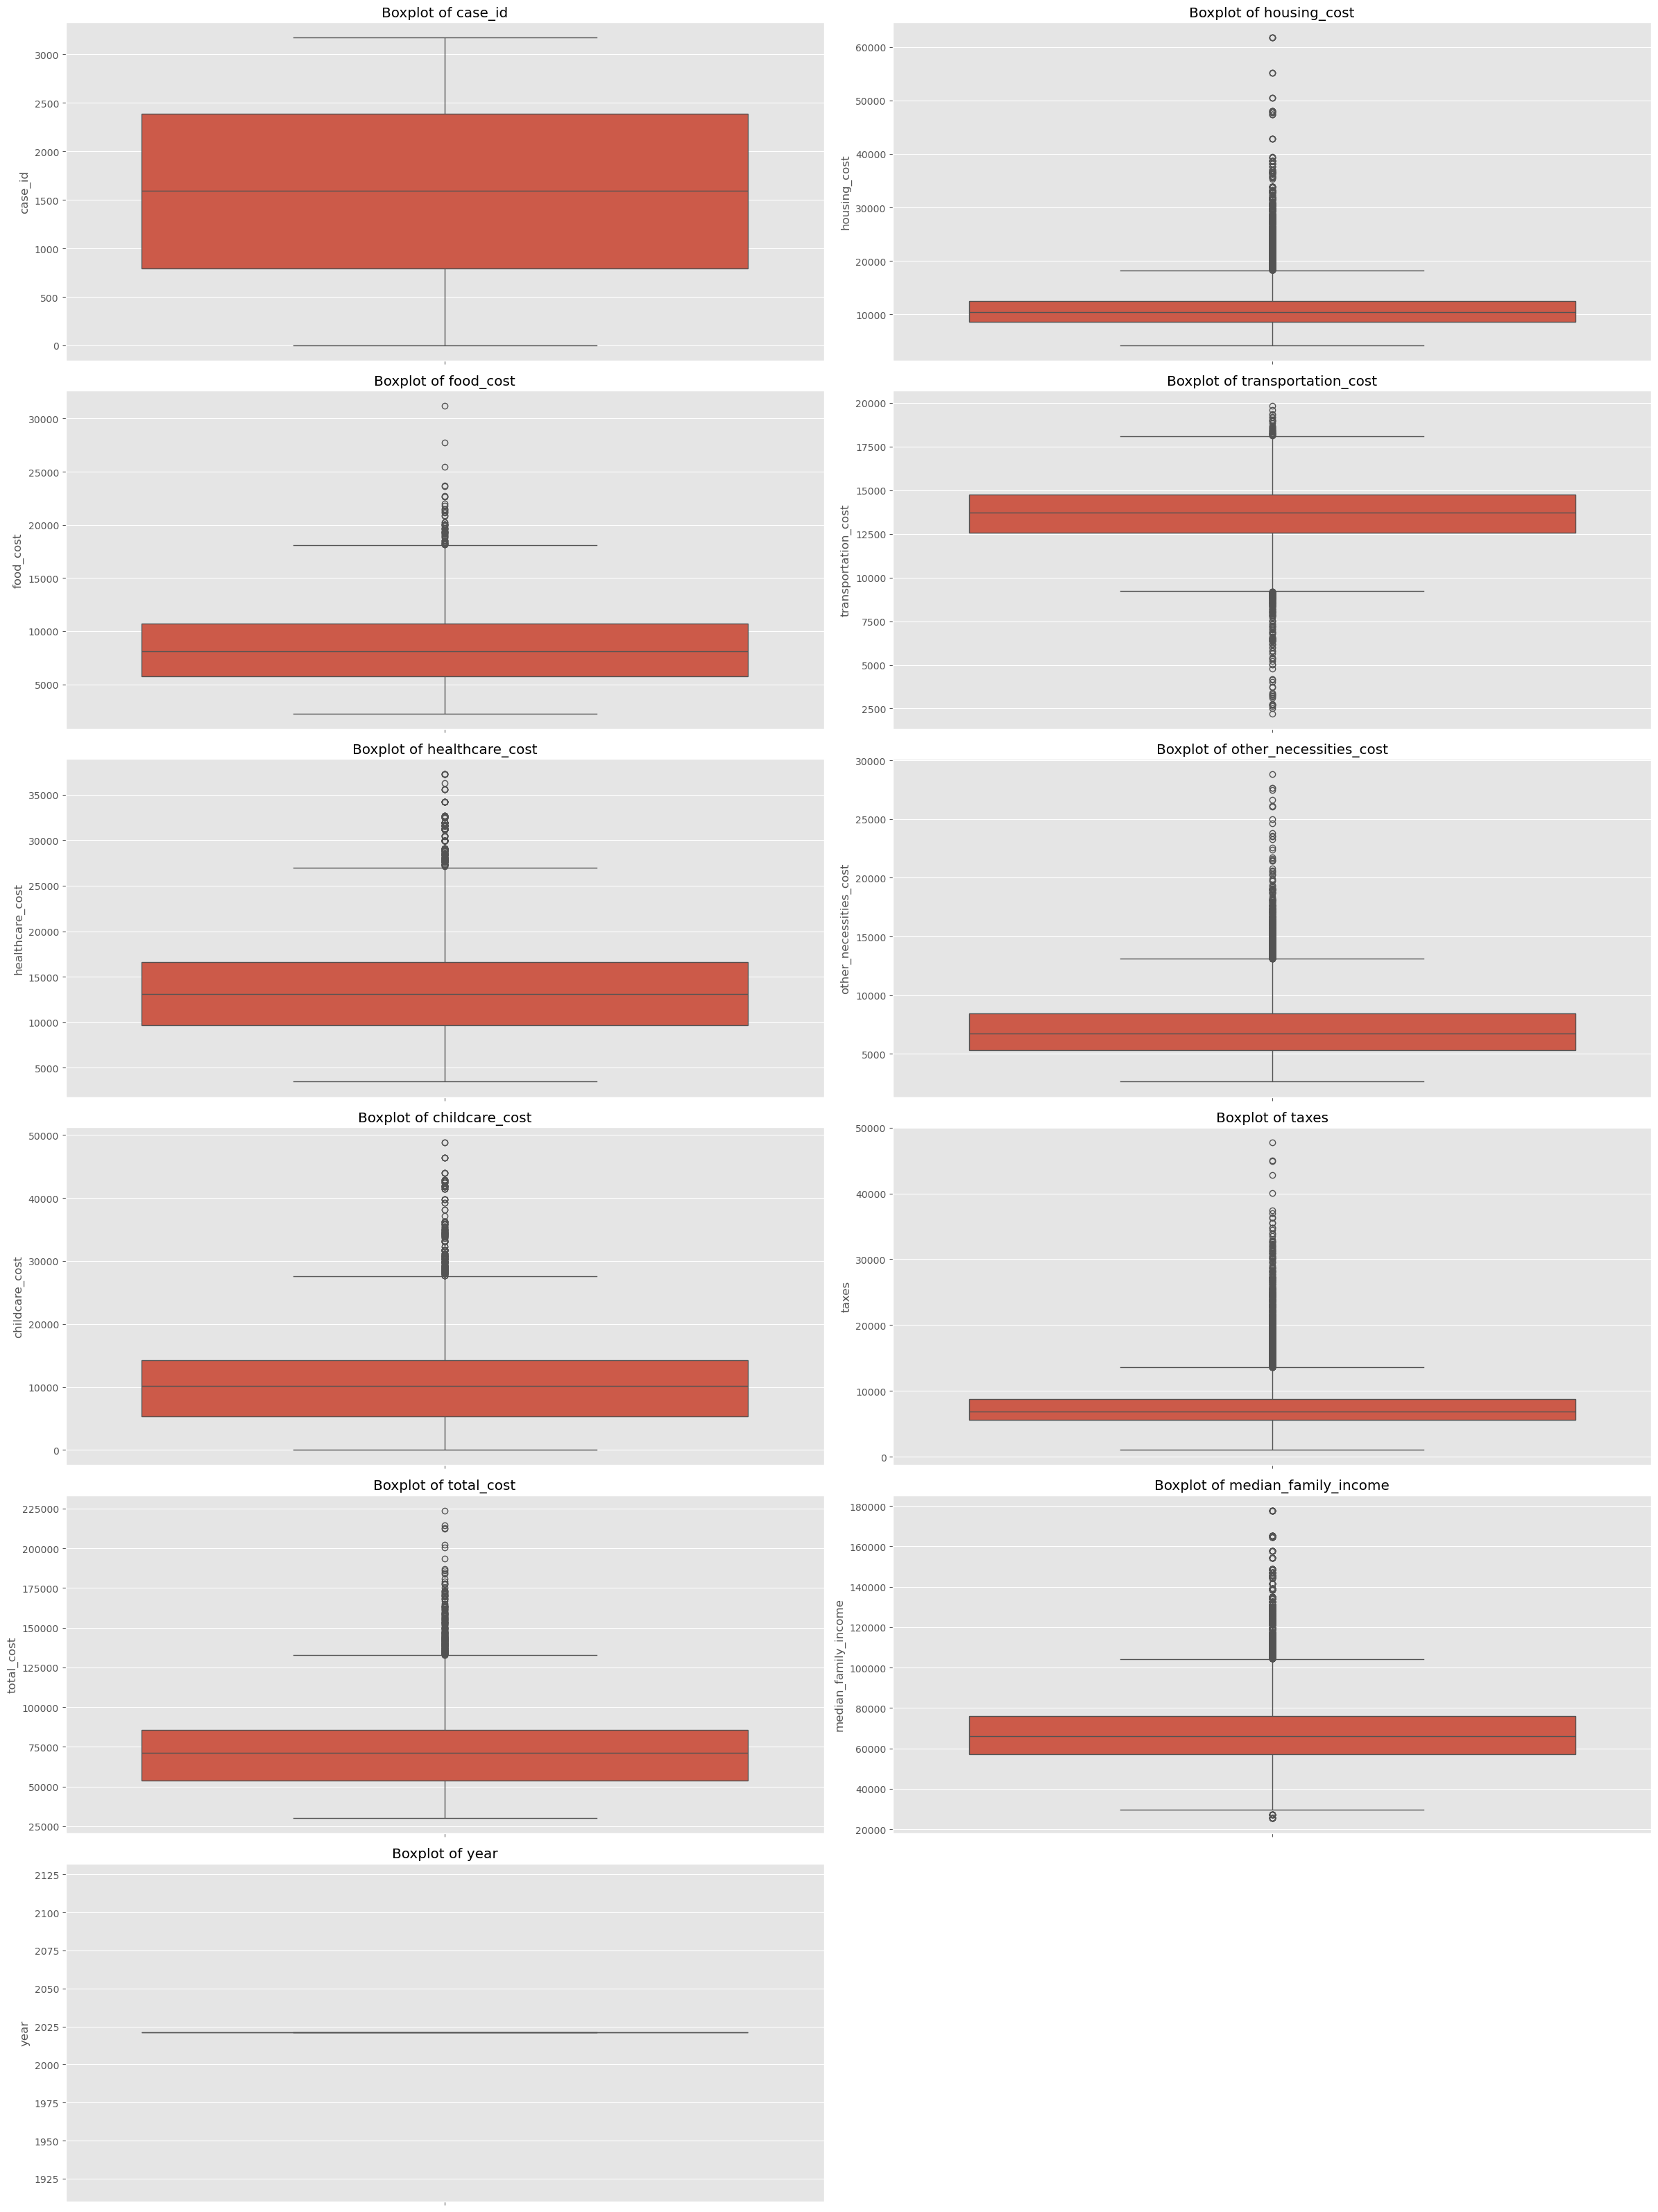

In [47]:
plt.figure(figsize=(24, 32))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns, 1):
    plt.subplot(len(df.select_dtypes(include=[np.number]).columns)//2 + 1, 2, i)
    sns.boxplot(data=df, y=column)  # Removed the palette parameter
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

# Section 11: Univariate Analysis
Univariate analysis involves exploring each variable individually.
This section will provide detailed information about each variable, including value counts for categorical variables and summary statistics for numerical ones.

In [50]:
print("\nUnivariate Analysis:")
for column in df.columns:
    print(f"\nAnalysis for {column}:")
    if df[column].dtype == 'object':
        print(df[column].value_counts())
    else:
        print(df[column].describe())


Univariate Analysis:

Analysis for case_id:
count    31430.000000
mean      1589.311804
std        917.218414
min          1.000000
25%        792.000000
50%       1593.000000
75%       2386.000000
max       3171.000000
Name: case_id, dtype: float64

Analysis for state:
state
TX    2540
GA    1590
VA    1330
KY    1200
MO    1160
KS    1050
IL    1020
NC    1000
IA     990
TN     950
NE     930
IN     920
OH     880
MN     870
MI     830
MS     820
OK     770
AR     750
WI     720
PA     670
AL     670
FL     670
SD     660
CO     640
LA     640
NY     620
CA     580
MT     560
WV     550
ND     530
SC     460
ID     440
WA     390
OR     360
NM     330
AK     290
UT     290
MD     240
WY     230
NJ     210
NV     170
ME     160
AZ     150
VT     140
MA     140
NH     100
CT      80
RI      50
HI      50
DE      30
DC      10
Name: count, dtype: int64

Analysis for isMetro:
count     31430
unique        2
top       False
freq      19730
Name: isMetro, dtype: object

Analysis for arean

# Section 12: Bivariate Analysis
Bivariate analysis involves exploring the relationship between two variables.
We'll use joint plots to visualize these relationships, which combine scatter plots with histograms.

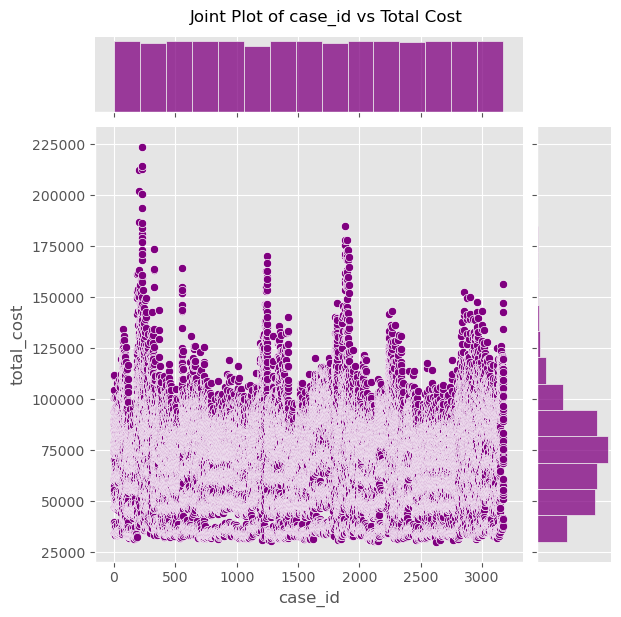

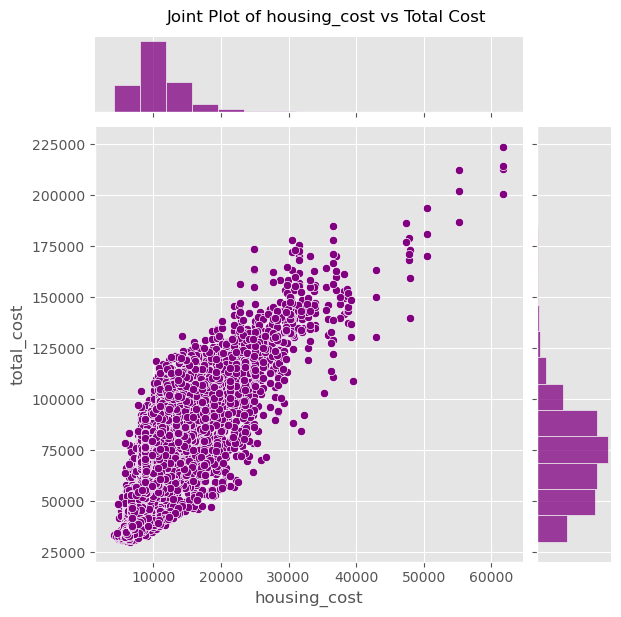

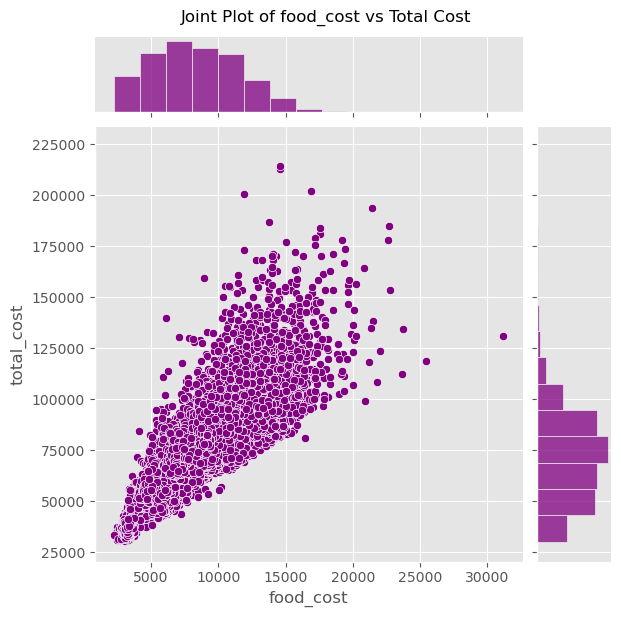

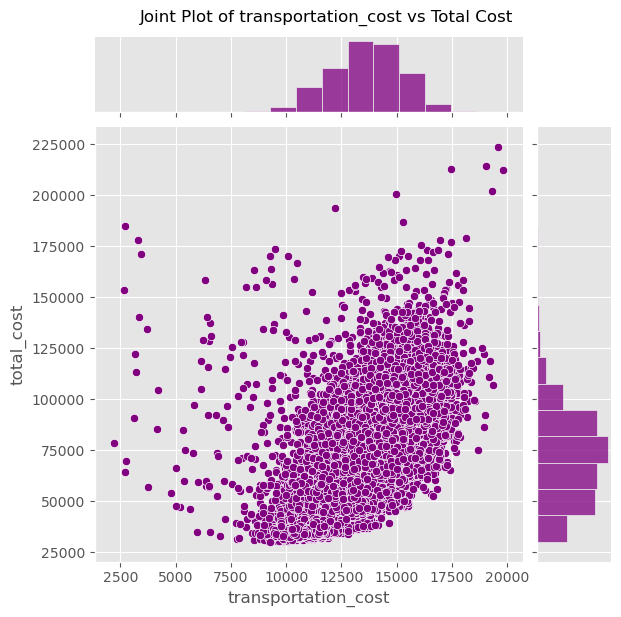

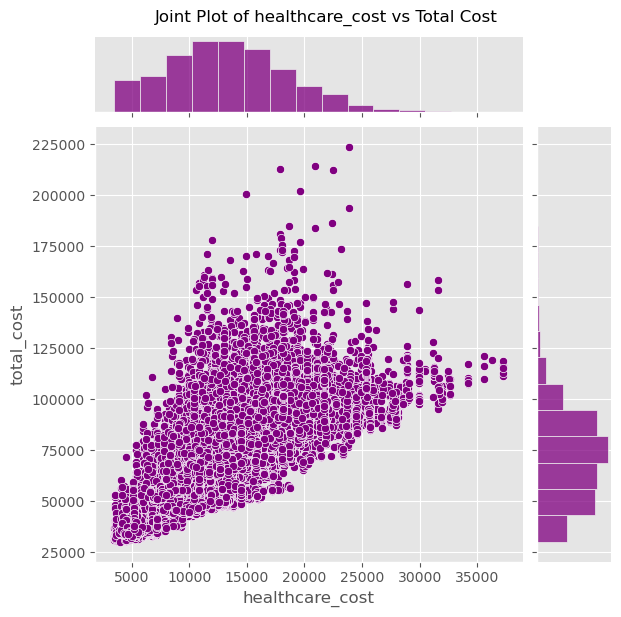

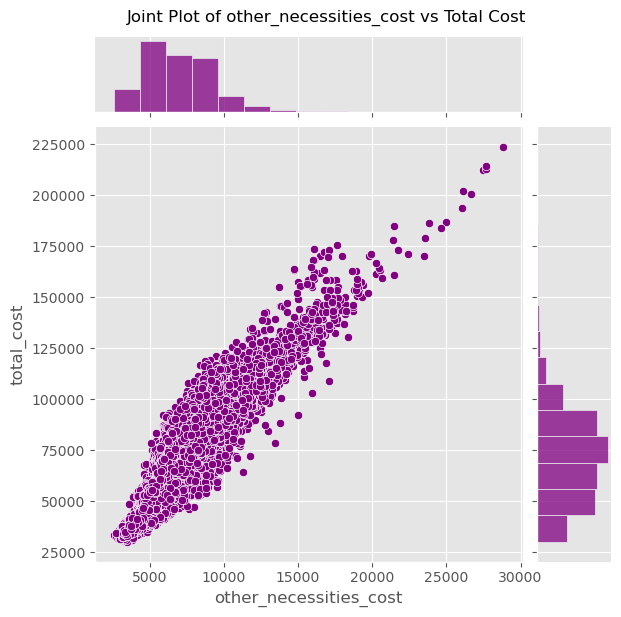

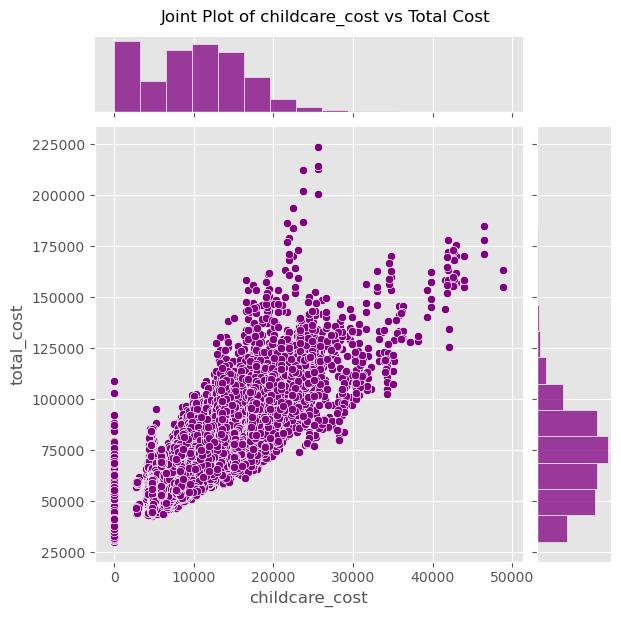

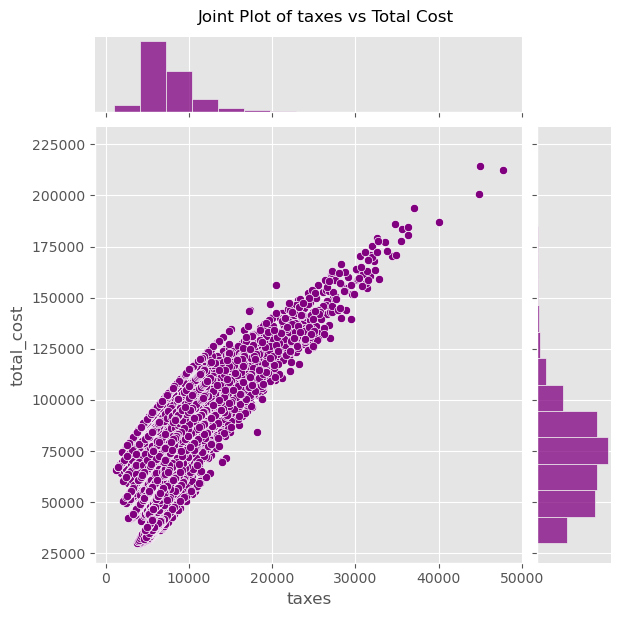

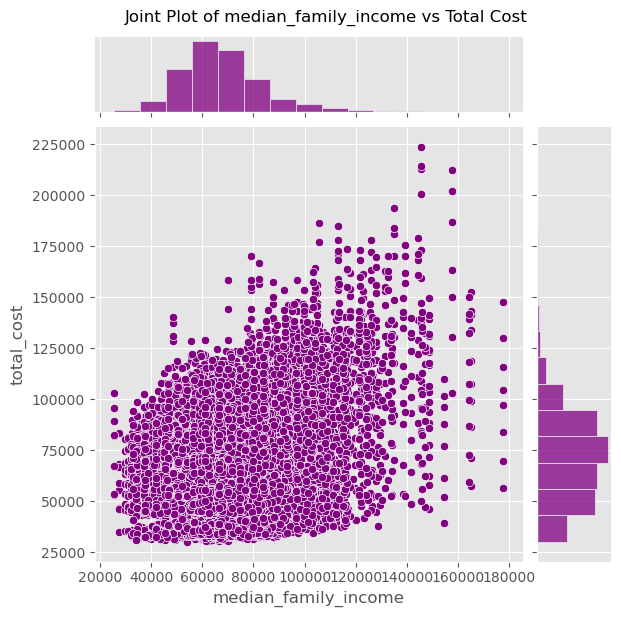

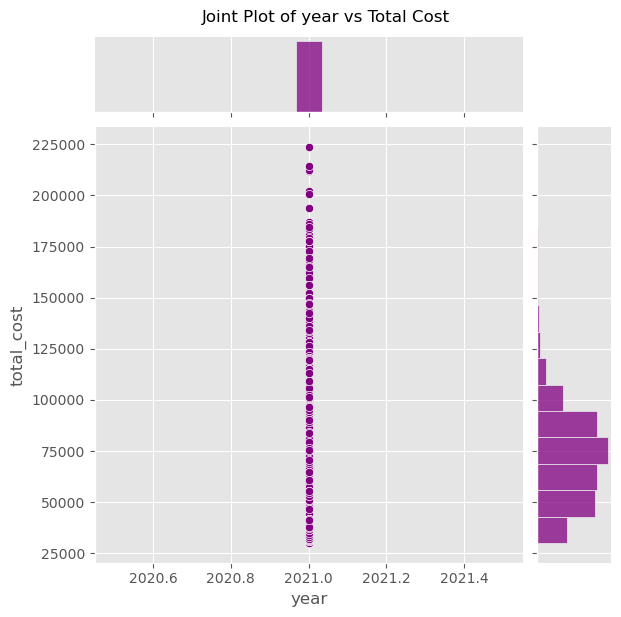

In [59]:
for column in df.select_dtypes(include=[np.number]).columns:
    if column != 'total_cost':  # Ensure we don't plot total_cost vs total_cost
        sns.jointplot(x=column, y='total_cost', data=df, kind='scatter', color='purple', marginal_kws=dict(bins=15, fill=True))
        plt.suptitle(f'Joint Plot of {column} vs Total Cost', y=1.02)
        plt.show()

# Currency Exchange Dataset Challenges

## Introduction
This notebook contains a series of challenges designed to help you apply the EDA techniques you've learned. The dataset provided contains daily currency exchange rates over time. You will use various data analysis and visualisation techniques to answer the questions posed in each challenge.

## Challenge 1: Descriptive Statistics
**Goal:** Calculate and interpret basic descriptive statistics for the `EUR` exchange rate.

- Calculate the mean, median, mode, standard deviation, and range for the `EUR` exchange rate.

## Challenge 2: Histogram Analysis
**Goal:** Visualise the distribution of the `GBP` exchange rate and analyse its shape.

- Create a histogram to visualise the distribution of the `GBP` exchange rate.
- Determine if the distribution is normal, skewed, or has any notable features such as peaks or gaps.

## Challenge 3: Correlation Matrix
**Goal:** Examine the relationships between all currency exchange rates in the dataset.

- Calculate the correlation matrix for all currency exchange rates in the dataset.
- Identify which currency pairs are positively correlated and consider what this might imply in the context of global currency movements.

## Challenge 4: Boxplot Analysis
**Goal:** Identify any outliers in the `JPY` exchange rate and understand their impact on the data.

- Create a boxplot for the `JPY` exchange rate.
- Identify any outliers you observe.

## Challenge 5: Univariate Analysis
**Goal:** Explore the variability of the `CHF` exchange rate over time.

- Plot a line graph of the `CHF` exchange rate over time.
- Perform a univariate analysis by calculating and interpreting the mean, median, and standard deviation.